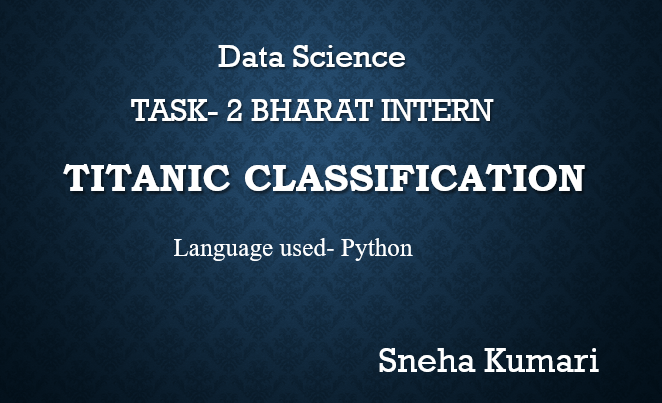

In [1]:
from IPython import display
display.Image("TIT.png")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
# Load the train datasets
trn_df = pd.read_csv('tit_train.csv')

In [4]:
trn_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trn_df.shape

(891, 12)

In [6]:
trn_df.size

10692

In [7]:
#check for non -null value in datset
trn_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

so, from above function we got to know (Age),(Cabin) & (Embarked) have null values

In [8]:
# Check for missing values
missing_values = trn_df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

so, from above it is identified age:177, cabin:687 & embarked:2 have missing values.

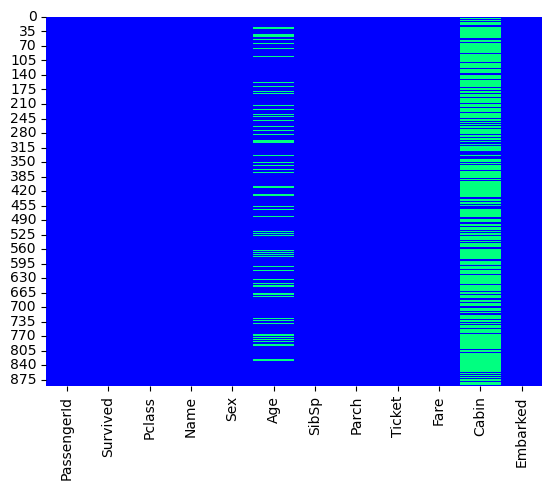

In [9]:
#visualize the missing data
sns.heatmap(trn_df.isnull(), cmap='winter', cbar=False)
plt.show()

#Handle the missing values
so, here for numerical value fill it with mean and for categorical value fill it with 'unknown'

In [10]:
numerical_columns = trn_df.select_dtypes(include=['int64', 'float64']).columns
trn_df[numerical_columns] = trn_df[numerical_columns].fillna(trn_df[numerical_columns].mean())

In [11]:
categorical_columns = trn_df.select_dtypes(include='object').columns
trn_df[categorical_columns] = trn_df[categorical_columns].fillna('Unknown')

In [12]:
# Chcek if any missing value is left after handling
print(trn_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
trn_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Factors that might influence a person's likelihood of survival in the context of the Titanic sinking for this case is Pclass(Passenger Class), sex, age,SibSp (Number of Siblings/Spouses),Parch (Number of Parents/Children),

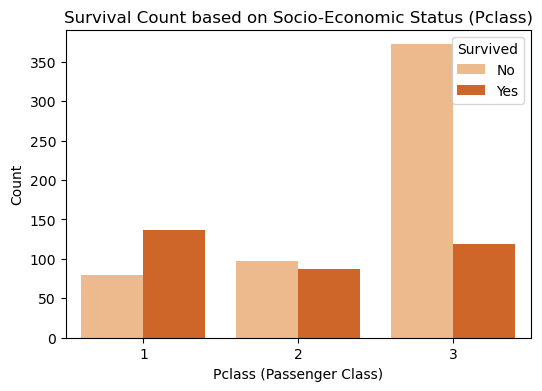

In [14]:
# Visualizing survival based on socio-economic status (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=trn_df, palette='Oranges')
plt.title('Survival Count based on Socio-Economic Status (Pclass)')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

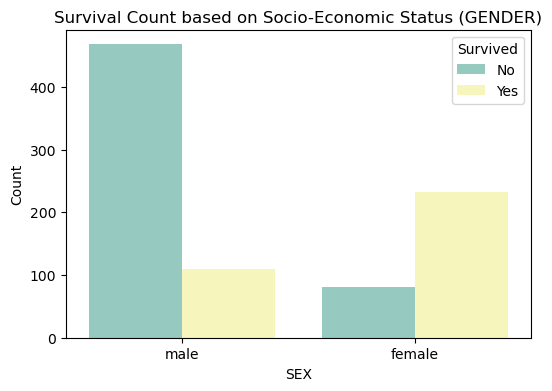

In [15]:
# Visualizing survival based on socio-economic status (Gender)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=trn_df, palette='Set3')
plt.title('Survival Count based on Socio-Economic Status (GENDER)')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

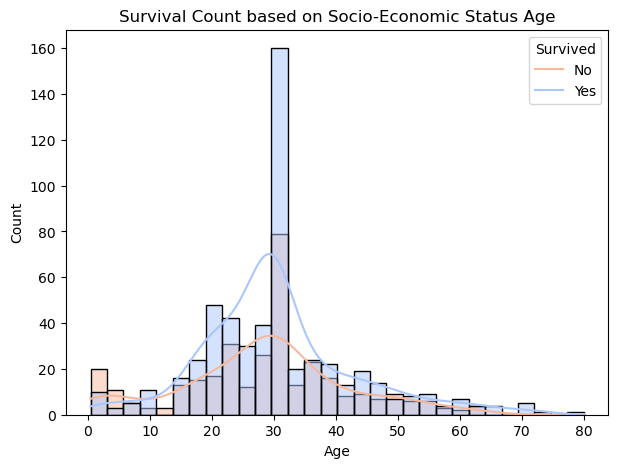

In [16]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(7, 5))
sns.histplot(x='Age', hue='Survived', data=trn_df, kde=True, palette='coolwarm')
plt.title('Survival Count based on Socio-Economic Status Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

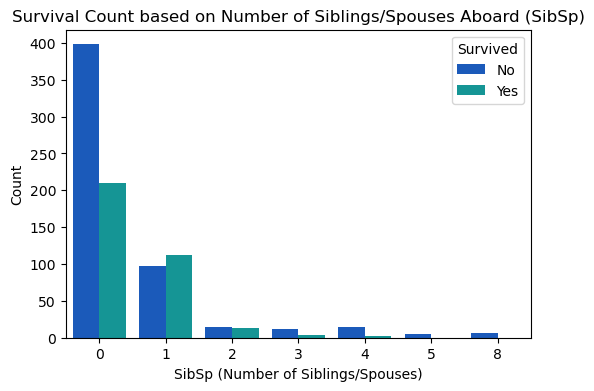

In [17]:
# Visualizing survival based on socio-economic status (siblings/spouses aboard (SibSp))
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=trn_df, palette='winter')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

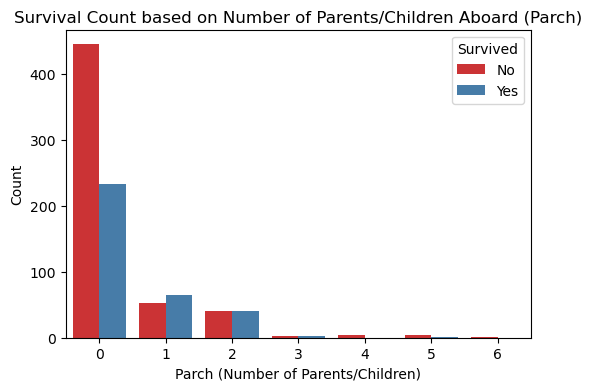

In [18]:
# Visualizing survival based on socio-economic status (number of parents/children aboard (Parch))
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=trn_df, palette='Set1')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [19]:
trn_df. head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [20]:
# Drop columns that are not likely to be useful for prediction
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

trn_df1 = trn_df.drop(columns=columns_to_drop)

In [21]:
trn_df1

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,29.699118,1,2
889,1,1,male,26.000000,0,0


In [22]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
trn_df1['Sex'] = label_encoder.fit_transform(trn_df1['Sex'])

In [23]:
# Separate features and target variable
X = trn_df1.drop('Survived', axis=1)
y = trn_df1['Survived']

In [24]:
# Split the training data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [26]:
#Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7597765363128491


In [27]:
test_df = pd.read_csv('tit_test.csv')

In [28]:
test_df.head(2).T

,0,1
PassengerId,892,893
Pclass,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)"
Sex,male,female
Age,34.5,47.0
SibSp,0,1
Parch,0,0
Ticket,330911,363272
Fare,7.8292,7.0
Cabin,NaN,NaN


In [29]:
# Drop columns that are not likely to be useful for prediction
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

test_df1 = test_df.drop(columns=columns_to_drop)

In [30]:
test_df1

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


In [31]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
test_df1['Sex'] = label_encoder.fit_transform(test_df1['Sex'])

In [32]:
test_df1.count()

Pclass    418
Sex       418
Age       332
SibSp     418
Parch     418
dtype: int64

In [33]:
# Check for missing values
missing_values = test_df1.isnull().sum()
missing_values

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64

In [34]:
#Handle missing value
test_df1['Age'] = test_df1['Age'].fillna(test_df1['Age'].mean())

In [35]:
# Predict on the test Dataset
predictions = model.predict(test_df1)

In [36]:
prediction_data=pd.DataFrame({'PassengerId': pd.read_csv('tit_test.csv')['PassengerId'],'Survived': predictions})
prediction_data.to_csv('tit_prediction_df.csv', index=False) 

In [37]:
# Load the tit_prediction_df datasets
predict_df = pd.read_csv('tit_prediction_df.csv')

In [38]:
predict_df.head(419)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


So, here you can see for the test data prediction is done using decision tree classifier

Now lets do it using RandomForest cLassifier

In [39]:
# Split the training data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

In [41]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Predict on the train dataset and check for accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8268156424581006


In [43]:
# Predict on the test set
predict_random= model.predict(test_df1)

In [44]:
prediction_data=pd.DataFrame({'PassengerId': pd.read_csv('tit_test.csv')['PassengerId'],'Survived': predict_random})
prediction_data.to_csv('tit_prediction_df.csv', index=False) 

In [45]:
# Load the tit_prediction_df datasets
predict_random_df = pd.read_csv('tit_prediction_df.csv')

In [46]:
predict_random_df. head(419)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
